In [ ]:
#for dataframe maniplation
import pandas as pd
#for mathemaical operations
import numpy as np

## for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# setting parameters for visualization
plt.rcParams['figure.figsize'] = (16, 5)
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')

import warnings
warnings.filterwarnings("ignore")

import joblib

In [ ]:
dataframe = pd.read_csv("/content/med-insurance.csv")

In [ ]:
dataframe.head(10).style.background_gradient(cmap="Wistia")

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900000,0,yes,southwest,16884.920000
1,18,male,33.800000,1,no,southeast,1725.550000
2,28,male,33.000000,3,no,southeast,4449.460000
3,33,male,22.700000,0,no,northwest,21984.470000
4,32,male,28.900000,0,no,northwest,3866.860000
5,31,female,25.700000,0,no,southeast,3756.620000
6,46,female,33.400000,1,no,southeast,8240.590000
7,37,female,27.700000,3,no,northwest,7281.510000
8,37,male,29.800000,2,no,northeast,6406.410000
9,60,female,25.800000,0,no,northwest,28923.140000


In [ ]:
dataframe.tail(10).style.background_gradient(cmap="Wistia")

,age,sex,bmi,children,smoker,region,expenses
1328,23,female,24.200000,2,no,northeast,22395.740000
1329,52,male,38.600000,2,no,southwest,10325.210000
1330,57,female,25.700000,2,no,southeast,12629.170000
1331,23,female,33.400000,0,no,southwest,10795.940000
1332,52,female,44.700000,3,no,southwest,11411.690000
1333,50,male,31.000000,3,no,northwest,10600.550000
1334,18,female,31.900000,0,no,northeast,2205.980000
1335,18,female,36.900000,0,no,southeast,1629.830000
1336,21,female,25.800000,0,no,southwest,2007.950000
1337,61,female,29.100000,0,yes,northwest,29141.360000


In [ ]:

dataframe.sample(5).style.background_gradient(cmap="Wistia")

,age,sex,bmi,children,smoker,region,expenses
508,24,female,25.300000,0,no,northeast,3044.210000
297,47,male,25.400000,1,yes,southeast,21978.680000
361,35,male,30.500000,1,no,southwest,4751.070000
1031,55,female,35.200000,0,yes,southeast,44423.800000
837,56,female,28.300000,0,no,northeast,11657.720000


In [ ]:
dataframe.shape

(1338, 7)

In [ ]:
dataframe.min(axis=0)

,0
age,18
sex,female
bmi,16.0
children,0
smoker,no
region,northeast
expenses,1121.87


In [ ]:
dataframe.max(axis=0, skipna=True)

,0
age,64
sex,male
bmi,53.1
children,5
smoker,yes
region,southwest
expenses,63770.43


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
dataframe.isnull()

,age,sex,bmi,children,smoker,region,expenses
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
dataframe.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
expenses,0


In [ ]:
dataframe.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
dataframe.describe().T.style.background_gradient(cmap="Wistia")

,count,mean,std,min,25%,50%,75%,max
age,1338.000000,39.207025,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.000000,30.665471,6.098382,16.000000,26.300000,30.400000,34.700000,53.100000
children,1338.000000,1.094918,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
expenses,1338.000000,13270.422414,12110.011240,1121.870000,4740.287500,9382.030000,16639.915000,63770.430000


Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'smoker')

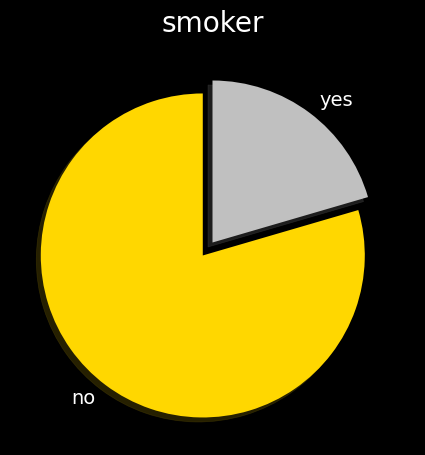

In [ ]:
plt.subplot(1, 3, 1)
plt.pie(dataframe['smoker'].value_counts().values,
        labels = dataframe['smoker'].value_counts().index,
        colors = ['gold','silver'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0])
plt.title('smoker')


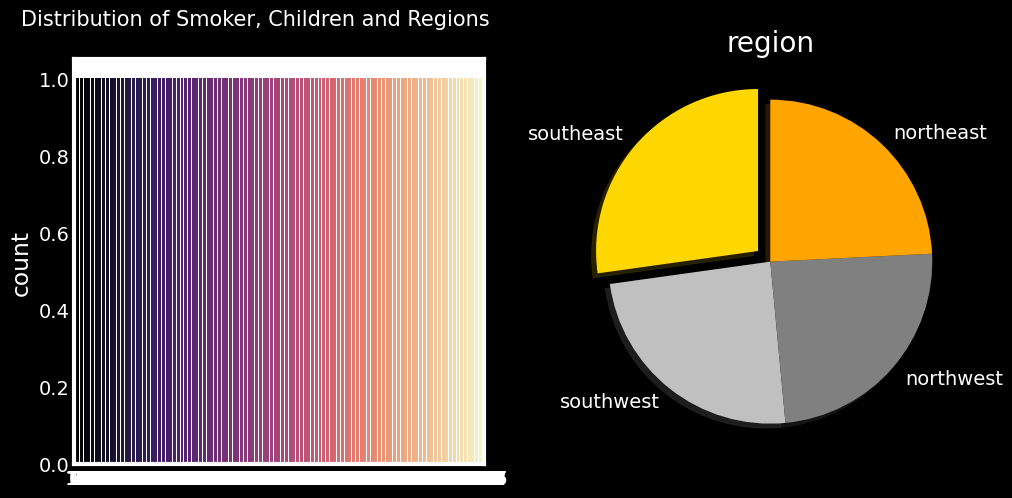

In [ ]:

plt.subplot(1, 3, 2)
sns.countplot(dataframe['children'], palette = 'magma')
plt.grid()

plt.subplot(1, 3, 3)
plt.pie(dataframe['region'].value_counts().values,
        labels = dataframe['region'].value_counts().index,
        colors = ['gold','silver','grey','orange'],
        startangle = 90,
        shadow = True,
       explode = [0.1, 0, 0, 0])
plt.title('region')
plt.suptitle('Distribution of Smoker, Children and Regions', fontsize = 15)
plt.show()

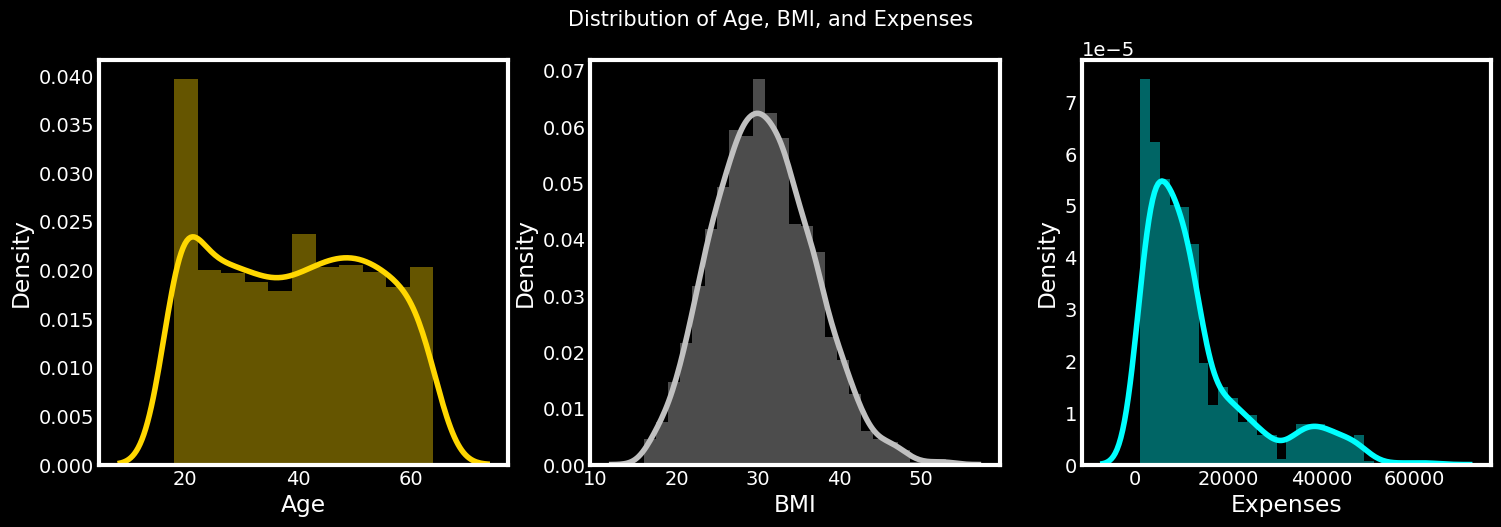

In [ ]:
plt.subplot(1, 3, 1)
sns.distplot(dataframe['age'], color = 'gold')
plt.xlabel('Age')
plt.grid()

plt.subplot(1, 3, 2)
sns.distplot(dataframe['bmi'], color = 'silver')
plt.xlabel('BMI')
plt.grid()

plt.subplot(1, 3, 3)
sns.distplot(dataframe['expenses'], color = 'aqua')
plt.xlabel('Expenses')
plt.grid()

plt.suptitle('Distribution of Age, BMI, and Expenses', fontsize = 15)
plt.show()

In [ ]:

#imapact on the age
px.scatter(dataframe, y = 'expenses',
           x = 'age',
           marginal_y = 'violin',
           trendline = 'ols',template = 'presentation')

In [ ]:
#impact of bmi
px.scatter(dataframe, y = 'expenses',
           x = 'bmi',
           marginal_y = 'violin',
           trendline = 'ols',template = 'ggplot2')


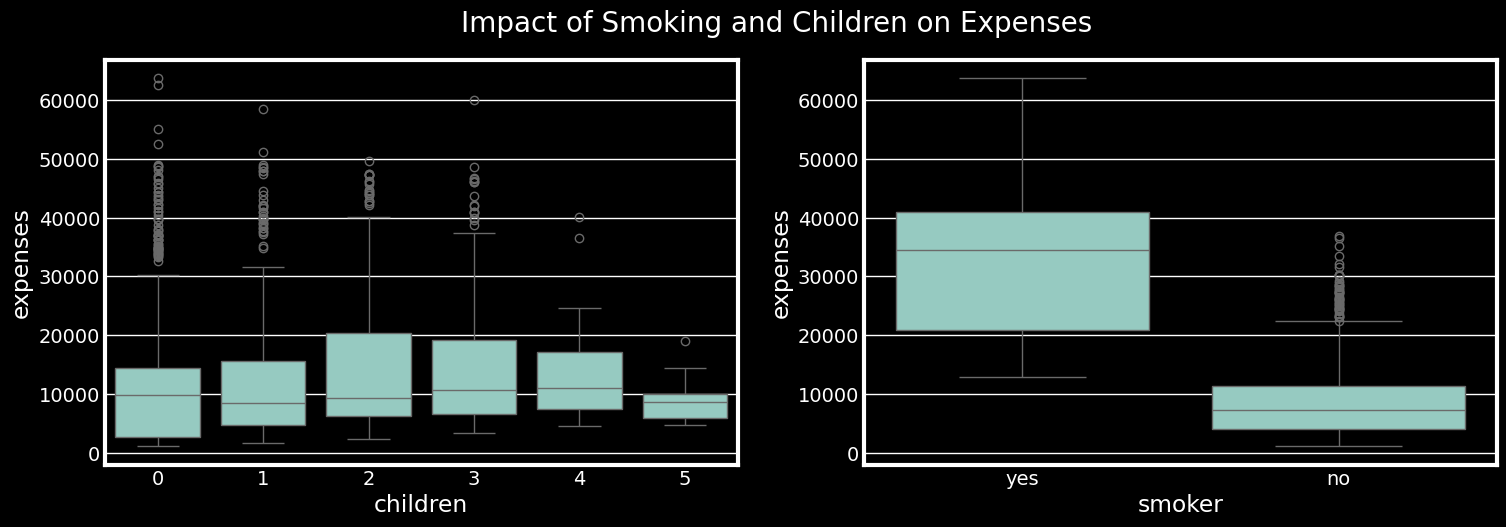

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
plt.subplot(1, 2, 1)
sns.boxplot(x=dataframe['children'], y=dataframe['expenses'])

plt.subplot(1, 2, 2)
sns.boxplot(x=dataframe['smoker'], y=dataframe['expenses'])

# Set the title for the entire figure
plt.suptitle('Impact of Smoking and Children on Expenses', fontsize=20)

# Show the plot
plt.show()


In [ ]:
px.scatter(dataframe,
        x="expenses",
                 y="age",
                 facet_row="children",
                 facet_col="region",
                 color="smoker",
                 trendline="ols",template = 'xgridoff'
        )

In [ ]:
#The Expenses of Smokers in all regions ranges from 20 to 60k
#Whereas the Expenses of Non Smokers in all regions ranges from 10 to 20K
#The Lesser range of Expense is for lesser age people and vice versa

px.scatter(dataframe,
        x="expenses",
                 y="bmi",
                 facet_row="children",
                 facet_col="region",
                 color="smoker",
                 trendline="ols",template = 'plotly_dark')

In [ ]:
#We can clearly see that there is a increasing pattern for BMI as well.
#For smoker with less BMI: Expense is around 20k
#For Smokers with High BMI: Expense is around 50K
#For Non Smokers BMI is not a Huge Factor, The Expense range from 5k to 10k
#Bubble chart

px.scatter(dataframe,
                 x="expenses",
                 y="bmi",
                 size="age",
                 color="smoker",
           hover_name="expenses", size_max=15,template = 'gridon')

In [ ]:
#The Size of Bubble, which represents age, shows that people having higher expenses belong to Higher Expenses category
px.bar_polar(dataframe, r="expenses", theta="region", color = 'sex', template = 'plotly_dark',
            color_discrete_sequence= px.colors.sequential.Plasma_r)

In [ ]:
dataframe[['expenses', 'region']].groupby(['region']).agg(['min','mean','max']).style.background_gradient(cmap = 'Wistia')

**Data Cleaning and Preprocessing**

In [ ]:
null = pd.DataFrame({'Null Values' : dataframe.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (dataframe.isna().sum().sort_values(ascending=False)) / (dataframe.shape[0]) * (100)})
null.style.background_gradient(cmap="Wistia")

,Null Values,Percentage Null Values
age,0,0.000000
sex,0,0.000000
bmi,0,0.000000
children,0,0.000000
smoker,0,0.000000
region,0,0.000000
expenses,0,0.000000


In [ ]:
#drop invalid values
duplicate = dataframe.duplicated()
print(duplicate.sum())

1


In [ ]:
dataframe.drop_duplicates(inplace=True)

In [ ]:
duplicate = dataframe.duplicated()
print(duplicate.sum())

0


In [ ]:
num_features=[col for col in dataframe.columns if dataframe[col].dtype!='O']
num_features

['age', 'bmi', 'children', 'expenses']

In [ ]:
cat_features=[col for col in dataframe.columns if dataframe[col].dtype=='O']
cat_features

['sex', 'smoker', 'region']

In [ ]:
categorical=dataframe[cat_features]
categorical.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib


# Select the features and target
X = dataframe[['age', 'bmi', 'children']]  # Features
y = dataframe['expenses']  # Target variable

# Step 1: Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Scale the features using StandardScaler (important for many ML models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import joblib

# Sample dataframe (use your own dataframe in place of this)
# dataframe = pd.read_csv('your_dataset.csv')  # Uncomment and load your dataset

# Modify the 'smoker' column to 0 (no) and 1 (yes)
dataframe['smoker'] = dataframe['smoker'].map({'no': 0, 'yes': 1})

# Select features and target
X = dataframe[['age', 'bmi', 'children', 'smoker']]  # Include 'smoker' as a feature
y = dataframe['expenses']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Save the model and scaler
joblib.dump(model, 'expenses_predictor_model.pkl')
joblib.dump(scaler, 'scaler.pkl')



Mean Absolute Error: 2754.8927236380578


['scaler.pkl']

In [ ]:
import joblib
import pandas as pd

# 1. Load the saved model and scaler
model = joblib.load('expenses_predictor_model.pkl')
scaler = joblib.load('scaler.pkl')

# 2. Prepare the new data (Example for future predictions)
# Let's say you have new data in a pandas DataFrame like below
# Ensure the new data has the same columns: ['age', 'bmi', 'children', 'smoker']

new_data = pd.DataFrame({
    'age': [30],  # Example ages
    'bmi': [ 32.0],  # Example BMIs
    'children': [ 3],  # Example number of children
    'smoker': [1]  # Example smoker status (1 = yes, 0 = no)
})


# 4. Scale the new data using the same scaler
new_data_scaled = scaler.transform(new_data)

# 5. Make predictions with the loaded model
predictions = model.predict(new_data_scaled)

# 6. Show the predictions (medical expenses)
print("Predicted Expenses for new data:")
for i, prediction in enumerate(predictions):
    print(f"Person {i+1}: ${prediction:.2f}")


Predicted Expenses for new data:
Person 1: $38501.69


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import joblib

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the Linear Regression model
linear_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate the Linear Regression model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Absolute Error: {mae_linear}')

# Save the model and scaler
joblib.dump(linear_model, 'expenses_predictor_linear_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Linear Regression Mean Absolute Error: 4198.988866049105


['scaler.pkl']

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
import joblib

# Initialize the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(random_state=42)

# Train the Gradient Boosting Regressor model
gb_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the Gradient Boosting Regressor model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print(f'Gradient Boosting Mean Absolute Error: {mae_gb}')

# Save the model and scaler
joblib.dump(gb_model, 'expenses_predictor_gb_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


Gradient Boosting Mean Absolute Error: 2534.989886627764


['scaler.pkl']